In [1]:
%load_ext watermark
%load_ext autoreload

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs

sys.path.append("/glade/u/home/bbuchovecky/projects/utils")
import timeseries_processing as tsp
%aimport timeseries_processing
%autoreload 1

%watermark -iv -co -v

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

conda environment: clisci

cartopy   : 0.22.0
numpy     : 1.24.4
xarray    : 2023.10.1
matplotlib: 3.8.0
sys       : 3.11.6 | packaged by conda-forge | (main, Oct  3 2023, 10:40:35) [GCC 12.3.0]



# Post-spinup mode

In [8]:
%%time
lnd_startup = xr.open_mfdataset("~/scratch/archive/b.e21.B1850.f09_g17.FLAT10ctrl-esm.001.leafcn_high.bgc_spinup.check_startup/lnd/hist/b.e21.B1850.f09_g17.FLAT10ctrl-esm.001.leafcn_high.bgc_spinup.check_startup.clm2.h0.*.nc")

CPU times: user 304 ms, sys: 3.81 ms, total: 308 ms
Wall time: 311 ms


In [9]:
lnd_startup

<xarray.Dataset>
Dimensions:                          (levgrnd: 25, levlak: 10, levdcmp: 25,
                                      time: 1, hist_interval: 2, lon: 288,
                                      lat: 192, levsoi: 20, ltype: 9, nvegwcs: 4)
Coordinates:
  * levgrnd                          (levgrnd) float32 0.01 0.04 ... 28.87 42.0
  * levlak                           (levlak) float32 0.05 0.6 ... 34.33 44.78
  * levdcmp                          (levdcmp) float32 0.01 0.04 ... 28.87 42.0
  * time                             (time) object 0001-02-01 00:00:00
  * lon                              (lon) float32 0.0 1.25 2.5 ... 357.5 358.8
  * lat                              (lat) float32 -90.0 -89.06 ... 89.06 90.0
Dimensions without coordinates: hist_interval, levsoi, ltype, nvegwcs
Data variables: (12/495)
    mcdate                           (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mcsec                            (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mdcur                            (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mscur                            (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nstep                            (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds                      (time, hist_interval) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    ...                               ...
    XSMRPOOL                         (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    XSMRPOOL_RECOVER                 (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    ZBOT                             (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    ZWT                              (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    ZWT_CH4_UNSAT                    (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    ZWT_PERCH                        (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes: (12/100)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 09/30/24 23:04:44
    source:                                    Community Land Model CLM4.0
    hostname:                                  derecho
    ...                                        ...
    cft_irrigated_switchgrass:                 60
    cft_tropical_corn:                         61
    cft_irrigated_tropical_corn:               62
    cft_tropical_soybean:                      63
    cft_irrigated_tropical_soybean:            64
    time_period_freq:                          month_1

In [13]:
%%time
atm_startup = xr.open_mfdataset("~/scratch/archive/b.e21.B1850.f09_g17.FLAT10ctrl-esm.001.leafcn_high.bgc_spinup.check_startup/atm/hist/b.e21.B1850.f09_g17.FLAT10ctrl-esm.001.leafcn_high.bgc_spinup.check_startup.cam.h0.*.nc")

CPU times: user 268 ms, sys: 7.88 ms, total: 276 ms
Wall time: 276 ms


In [14]:
atm_startup

<xarray.Dataset>
Dimensions:                  (lat: 192, zlon: 1, nbnd: 2, lon: 288, lev: 32,
                              ilev: 33, time: 1)
Coordinates:
  * lat                      (lat) float64 -90.0 -89.06 -88.12 ... 89.06 90.0
  * zlon                     (zlon) float64 0.0
  * lon                      (lon) float64 0.0 1.25 2.5 ... 356.2 357.5 358.8
  * lev                      (lev) float64 3.643 7.595 14.36 ... 976.3 992.6
  * ilev                     (ilev) float64 2.255 5.032 10.16 ... 985.1 1e+03
  * time                     (time) object 0001-02-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/531)
    zlon_bnds                (zlon, nbnd) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    gw                       (lat) float64 dask.array<chunksize=(192,), meta=np.ndarray>
    hyam                     (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    hybm                     (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    P0                       float64 ...
    hyai                     (ilev) float64 dask.array<chunksize=(33,), meta=np.ndarray>
    ...                       ...
    soa_c1                   (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 192, 288), meta=np.ndarray>
    soa_c1SFWET              (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    soa_c2                   (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 192, 288), meta=np.ndarray>
    soa_c2SFWET              (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    wet_deposition_NHx_as_N  (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    wet_deposition_NOy_as_N  (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.B1850.f09_g17.FLAT10ctrl-esm.001.leafcn_high.bgc...
    logname:           bbuchovecky
    host:              derecho1
    initial_file:      /glade/campaign/cesm/cesmdata/inputdata/atm/cam/inic/f...
    topography_file:   /glade/campaign/cesm/cesmdata/inputdata/atm/cam/topo/f...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

# Pre-spinup mode

In [15]:
def get_flat10_variable(variable, domain, case, time_range=['0001-01', '0003-12'], experiment='ctrl-esm', use_mfdataset=False, verbose=False, reindex_like=None):
    '''
    Loads a single variable for a given time range from a FLAT10 simulation.
    '''
    # Get the CESM2 component for the given domain
    comp_dict = {
        'atm': 'cam',
        'lnd': 'clm2',
    }
    comp = comp_dict[domain]

    # Get the archive directory for the given case
    case_archive_dict = {
        '':            '/glade/campaign/cgd/tss/lawrence/archive',
        'leafcn_high': '/glade/derecho/scratch/bbuchovecky/archive',
        'leafcn_low':  '/glade/derecho/scratch/bbuchovecky/archive',
    }
    archive_dir = case_archive_dict[case]

    # Add a <.> delimiter for the file name
    if case != '':
        case = '.'+case

    # Construct the case name
    case_name = f'b.e21.B1850.f09_g17.FLAT10{experiment}.001{case}'

    time_start = time_range[0]
    time_end = time_range[1]

    # FLAT10ctrl-esm simulation with standard parameter set only goes until 0030-12
    if (case == '') and (int(time_end[:4]) > 30):
        time_end = '0030-12'

    if use_mfdataset:
        try:
            # Construct the file path with a wildcard for the time period
            glob_file_name = f'{archive_dir}/{case_name}/{domain}/hist/{case_name}.{comp}.h0.*.nc'

            concat_da = xr.open_mfdataset(glob_file_name)
            concat_da = concat_da[variable].sel(time=slice(time_start, time_end))
    
        except OverflowError:
            print('OverflowError: manually loading and concatenating each monthly output file')
            use_mfdataset = False
    
    if not use_mfdataset:
        da_list = []
        
        start_year = int(time_start[:4])
        start_month = int(time_start[5:])

        end_year = int(time_end[:4])
        end_month = int(time_end[5:])

        total_length_in_months = (end_year - start_year)*12 + end_month
        if verbose: print(f'length of timeseries [month]: {str(total_length_in_months).zfill(4)}')

        for year in range(start_year, end_year):
            for month in range(1, 13):
                da = xr.open_dataset(f'{archive_dir}/{case_name}/{domain}/hist/{case_name}.{comp}.h0.{str(year).zfill(4)}-{str(month).zfill(2)}.nc')[variable]
                da_list.append(da.copy(deep=True))

        for month in range(1, end_month+1):
            da = xr.open_dataset(f'{archive_dir}/{case_name}/{domain}/hist/{case_name}.{comp}.h0.{str(end_year).zfill(4)}-{str(month).zfill(2)}.nc')[variable]
            da_list.append(da.copy(deep=True))    

        concat_da = xr.concat(da_list, 'time')
    
    if ('time' in concat_da.dims) and (concat_da.time.size > 1):
        concat_da = concat_da.sel(time=slice(time_start, time_end))
    
    if reindex_like is not None:
        concat_da = concat_da.reindex(lat=reindex_like.lat, lon=reindex_like.lon, method='nearest', tolerance=1e-4)

    return concat_da

In [29]:
def plot_land_area_average_timeseries(variable, domain, time_range=['0001-01', '0003-12'], experiment='ctrl-esm', use_mfdataset=False, time_average='month'):
    # std = get_flat10_variable(variable, domain, '', time_range, experiment, use_mfdataset)
    hgh = get_flat10_variable(variable, domain, 'leafcn_high', time_range, experiment, use_mfdataset, reindex_like=None)

    if time_average == 'year':
        # std = tsp.calculate_annual_timeseries(std)
        hgh = tsp.calculate_annual_timeseries(hgh)

    landarea = get_flat10_variable('area', 'lnd', '', time_range=['0001-01', '0001-01']).isel(time=0)
    landfrac = get_flat10_variable('landfrac', 'lnd', '', time_range=['0001-01', '0001-01']).isel(time=0)
    landweights = (landarea*landfrac)/(landarea*landfrac).sum(dim=['lat', 'lon'])

    # ((std*landweights).sum(dim=['lat','lon'])/landweights.sum(dim=['lat','lon'])).plot(label='std')
    ((hgh*landweights).sum(dim=['lat','lon'])/landweights.sum(dim=['lat','lon'])).plot(label='hgh')
    plt.legend()
    plt.title(f'area-averaged {variable} over land')


def plot_land_area_integrated_timeseries(variable, domain, time_range=['0001-01', '0003-12'], experiment='ctrl-esm', use_mfdataset=False, time_average='month'):
    # std = get_flat10_variable(variable, domain, '', time_range, experiment, use_mfdataset)
    hgh = get_flat10_variable(variable, domain, 'leafcn_high', time_range, experiment, use_mfdataset, reindex_like=None)

    if time_average == 'year':
        # std = tsp.calculate_annual_timeseries(std)
        hgh = tsp.calculate_annual_timeseries(hgh)

    landarea = get_flat10_variable('area', 'lnd', '', time_range=['0001-01', '0001-01']).isel(time=0)
    landfrac = get_flat10_variable('landfrac', 'lnd', '', time_range=['0001-01', '0001-01']).isel(time=0)

    # (std*landarea*landfrac*1e6).sum(dim=['lat','lon']).plot(label='std')
    (hgh*landarea*landfrac*1e6).sum(dim=['lat','lon']).plot(label='hgh')
    plt.legend()
    plt.title(f'area-integrated {variable} over land')


def plot_area_average_timeseries(variable, domain, time_range=['0001-01', '0003-12'], experiment='ctrl-esm', use_mfdataset=False, time_average='month'):
    # std = get_flat10_variable(variable, domain, '', time_range, experiment, use_mfdataset)
    hgh = get_flat10_variable(variable, domain, 'leafcn_high', time_range, experiment, use_mfdataset, reindex_like=None)

    if time_average == 'year':
        # std = tsp.calculate_annual_timeseries(std)
        hgh = tsp.calculate_annual_timeseries(hgh)
    
    area = get_flat10_variable('AREA', 'atm', '', time_range=['0001-01', '0001-01']).isel(time=0)
    weights = area/area.sum(dim=['lat', 'lon'])

    # ((std*weights).sum(dim=['lat','lon'])/weights.sum(dim=['lat','lon'])).plot(label='std')
    ((hgh*weights).sum(dim=['lat','lon'])/weights.sum(dim=['lat','lon'])).plot(label='hgh')
    plt.legend()
    plt.title(f'area-averaged {variable}')

In [17]:
orig_totsomc = get_flat10_variable('TOTSOMC', 'lnd', 'leafcn_high', time_range=['0040-01', '0042-12'], experiment='ctrl-esm', use_mfdataset=False, verbose=True)

length of timeseries [month]: 0036


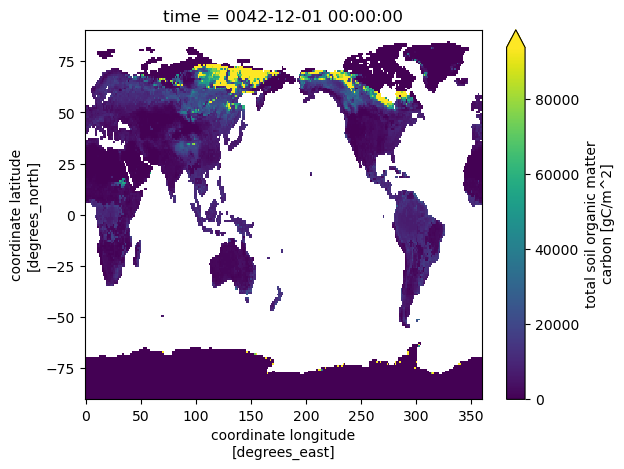

In [30]:
orig_totsomc.isel(time=-1).plot(robust=True)

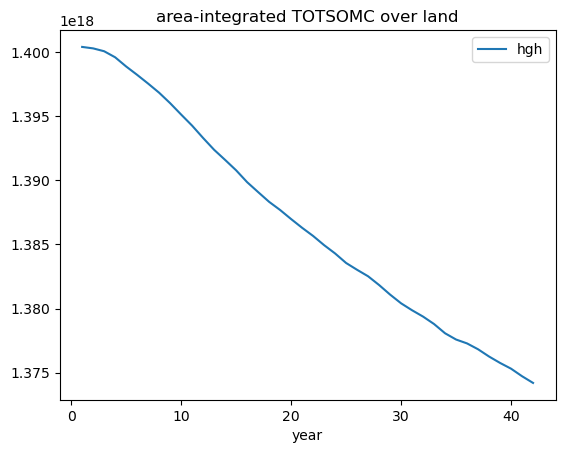

In [46]:
plot_land_area_integrated_timeseries('TOTSOMC', 'lnd', time_range=['0001-01', '0042-12'], experiment='ctrl-esm', use_mfdataset=False, time_average='year')

In [40]:
this_var = lnd_startup.TOTSOMC.isel(time=0)

landarea = get_flat10_variable('area', 'lnd', '', time_range=['0001-01', '0001-01']).isel(time=0)
landfrac = get_flat10_variable('landfrac', 'lnd', '', time_range=['0001-01', '0001-01']).isel(time=0)
this_areaint = (this_var*landarea*landfrac*1e6).sum(dim=['lat','lon'])

In [42]:
this_areaint.values

array(1.2241887e+18, dtype=float32)